---

># **PROBLEM STATEMENT**
>---
>> ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*I have just been employed ny a car dealership based in the state of california. For a long a time dealership was operating at a high performance level. However, throughout the years market started to get populated with more and more new car sales establishments. The reason for that being influx of foreign cars into the US. This in turn, caused the sales to diminish plummeting the demand for the cars in this particular dealership. Fortunately, Data Science department was established to which i was assigned as a junior Data Scientist. Business management feeling the effects of competition increase tasked the Lead Data Scientist to provide certain ways to fix this problem relying on a data. Data which was collected throughout the years by the Data Science department. Lead Data Scientist tasked me to provide and present the EDA of the data to business owners and stakeholders.*
---

---

># **BENEFITS OF SOLUTION**
>---
>> ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Management having a modern outlook for the emerging problem solution relied on data for the answers. Me as part of the team will have to analyze, clean, present and provide solutions to the questions that might be posed. Most efficient way to provide relevant and robust answers is to ask relevant questions. Therefore, I will pose certain questions in the course of the notebook and answer them with reference to the data. Having, data driven information will enable the business to make decision while being sufficiently informed on competition and other aspects of a business model. Which further will increase competitive advantage, efficient purchasing decisions, inventory decision and so forth.*
---

---

># **IMPORTATION OF LIBRARIES**

---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
from mpl_toolkits.basemap import Basemap
import plotly.express as px

---

># **LOADING DATA**

---

In [6]:
df = pd.read_csv("car_prices.csv")

>1. ### *Data is loaded and assigned to a pandas dataframe variable called df*
>---

---

># **UNDERSTANDING DATA**

---

In [7]:
print(f'Dataset Consists of {df.shape[0]} rows and {df.shape[1]} columns')

Dataset Consists of 558837 rows and 16 columns


>1. ### *As can be seen there is plenty of data-points nearly half a million*
>2. ### *This shows that data is sufficient to make data-driven decisions*
>---

In [8]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


>1. ### *The dataset is fairly consistent.*
>2. ### *Certain columns can be concatenated together as information is closely related.*
>3. ### *index can be set to "vin" number as it is a unique identifier of each vehicle.*
>4. ### *Some columns such as "saledate" can be removed and replaced with more informative data.*
>---

In [9]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

>1. ### *There are only 5 numerical values.*
>2. ### *The rest 8 values are categorical and are consistent with the features they represent*
>---

In [10]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


>1. ### *The dataset has data starting from 1982 till 2015*
>---

---

># **DATA PREPARATION**

---

---

>#### **COLUMN OPERATIONS**

---

In [11]:
df.set_index("vin", inplace=True)

>1. ### *default index column can be replaced with "vin" values as it is unique for each datapoint*
>---

In [12]:
df["model"] = df["model"] + " " + df["trim"].astype(str)
df.drop("trim" , axis=1, inplace=True)

>1. ### *As every vehicle model has different types("trim" according to the df) 2 columns were created originally*
>2. ### *Two columns "model" and "trim" can be concatenated into one column to provide more concise dataset*
>3. ### *Concatenation can be done by casting "trim" as a string and concatenate it simply with "model" column*
>4. ### *After the concatenation "trim" column can be dropped*
>---

In [13]:
df.head(3)

,year,make,model,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
vin,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
5xyktca69fg561319,2015,Kia,Sorento LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
wba3c1c51ek116351,2014,BMW,3 Series 328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [14]:
df.drop("transmission", axis=1, inplace=True)

>1. ### *"transmission" column is redundant in the context of the task therefore, it can be dropped*
>---

In [15]:
df.drop("saledate", axis=1, inplace=True)
df["price_diff"] = df["sellingprice"] - df["mmr"] 
df.head(2)

,year,make,model,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,price_diff
vin,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento LX,SUV,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,1000.0
5xyktca69fg561319,2015,Kia,Sorento LX,SUV,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,700.0


>1. ### *"saledate" being irrelevant for the task can be replaced*
>2. ### *new column has been created called "price_diff" instead of "saledate. Including all the differences between "mmr" and "sellingprice"*
>3. ### *"mmr" being the index of a general pricing of the cars, difference between "sellingprice" and "mmr" can provide more relevant information on dealerships' operations*
>---

In [16]:
df.rename(columns={"odometer" : "mileage" ,
									 "mmr" : "MMR index"}, inplace=True)
df.head(2)

,year,make,model,body,state,condition,mileage,color,interior,seller,MMR index,sellingprice,price_diff
vin,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento LX,SUV,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,1000.0
5xyktca69fg561319,2015,Kia,Sorento LX,SUV,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,700.0


>1. ### *For clarity reasons "odometer" column have been renamed to "mileage"*
>2. ### *"mmr" column have been renamed to "MMR index"*
>---

In [17]:
print(f"Dataset size has been reduced to {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset size has been reduced to 558837 rows and 13 columns.


---

>#### **HANDLING MISSING VALUES**

---

In [18]:
df.isna().sum()

year                0
make            10301
model           10399
body            13195
state               0
condition       11820
mileage            94
color             749
interior          749
seller              0
MMR index          38
sellingprice       12
price_diff         38
dtype: int64

>1. ### *Data suffers from some missing values in multiple columns*
>2. ### *"make", "model", "body" and "condition" features have approximately the same number of missing values*
>3. ### *Besides 4 features quantity of other missing values are not high in relation to the dataset size*
>4. ### *Due to high number of missing values for the 4 previously mentioned features and varying importance of information some rows with missing values will have to dropped and some will have to be forward filled*
>---

In [19]:
df.dropna(subset=["make", "model", "body"], inplace=True)

In [20]:
print(f"Dataset size has been reduced to {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset size has been reduced to 545544 rows and 13 columns.


In [21]:
df.isna().sum()

year                0
make                0
model               0
body                0
state               0
condition       11226
mileage            85
color             723
interior          723
seller              0
MMR index          38
sellingprice       12
price_diff         38
dtype: int64

>1. ### *Due to negligible number of missing values in "make","model" and "body"*
>2. ### *These data-points(rows) have been dropped by being passed as a subset to dropna option "subset"*
>---

In [24]:
print(f"Dataset size has been reduced to {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset size has been reduced to 545544 rows and 13 columns.


>1. ### *Imputing the "make" values would be wrong as forward and backwards fill will provide wrong values*
>2. ### *By dropping missing make values missing model values reduce as well and only 98 missing values are left*
>3. ### *Same as the make imputing the model values would be inefficient and will provide wrong information*
>---

In [25]:
df["MMR index"]=df["MMR index"].fillna(df["MMR index"].mean())
df["sellingprice"]=df["sellingprice"].fillna(df["sellingprice"].mean())
df["condition"] = df["condition"].fillna(df["condition"].mean())
df["mileage"] = df["mileage"].fillna(df["mileage"].mean())

In [26]:
df.isnull().sum()

year              0
make              0
model             0
body              0
state             0
condition         0
mileage           0
color           723
interior        723
seller            0
MMR index         0
sellingprice      0
price_diff       38
dtype: int64

In [27]:
print(f"Dataset size has been reduced to {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset size has been reduced to 545544 rows and 13 columns.


>1. ### *Some value more specifically continuous values can be imputed. This will not cause information loss*
>2. ### *Certain values such as "condition" and "MMR index" should be imputed with mean values to achieve more robust readings*
>3. ### *Missing values for "sellingprice", "condition","mileage" are filled with mean values*
>4. ### *Missing values for "MMR index" are filled with mean values as forward filling these values would produce fluctuating results in the "price_diff" column*
>---

In [133]:
df["color"] = df["color"].bfill()
df["interior"] = df["interior"].bfill()

In [29]:
df.isnull().sum()

year             0
make             0
model            0
body             0
state            0
condition        0
mileage          0
color            0
interior         0
seller           0
MMR index        0
sellingprice     0
price_diff      38
dtype: int64

>1. ### *Some categorical values are not that important for relevance of the dataset*
>2. ### *Missing values for "color", "interior" are backward filled*
>3. ### *These can be backward filled as the amount is not that high and information loss is minimal*
>4. ### *Price_diff will not be imputed due to low amount it can be left as is*
>---

In [30]:
df.head(3)

,year,make,model,body,state,condition,mileage,color,interior,seller,MMR index,sellingprice,price_diff
vin,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento LX,SUV,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,1000.0
5xyktca69fg561319,2015,Kia,Sorento LX,SUV,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,700.0
wba3c1c51ek116351,2014,BMW,3 Series 328i SULEV,Sedan,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,-1900.0


---

># **UNDERSTANDING FEATURES**

---

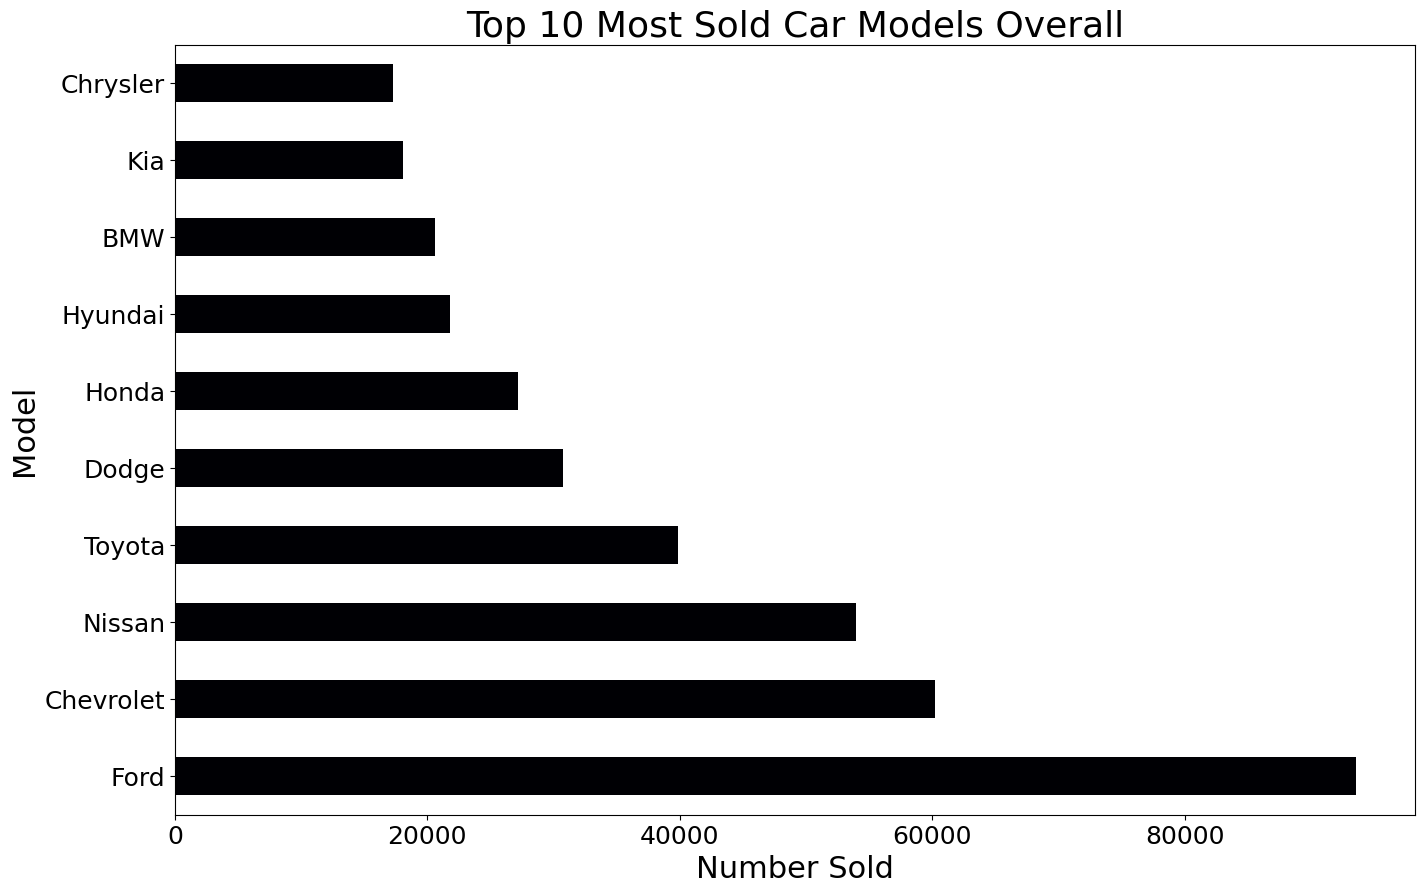

In [54]:
ax = df["make"].value_counts().head(10).plot(kind="barh",colormap="inferno", figsize=(16,10), fontsize=18)
ax.set_xlabel("Number Sold", fontsize = 22)
ax.set_ylabel("Model", fontsize = 22)
ax.set_title("Top 10 Most Sold Car Models Overall", fontsize=26)
plt.show()

>1. ### *According to the graph "Ford","Chevrolet" and "Nissan" are 3 highest selling cars*
>2. ### *Ford and Chevrolet are an American brand therefore, demand for them is higher in USA states*
>---

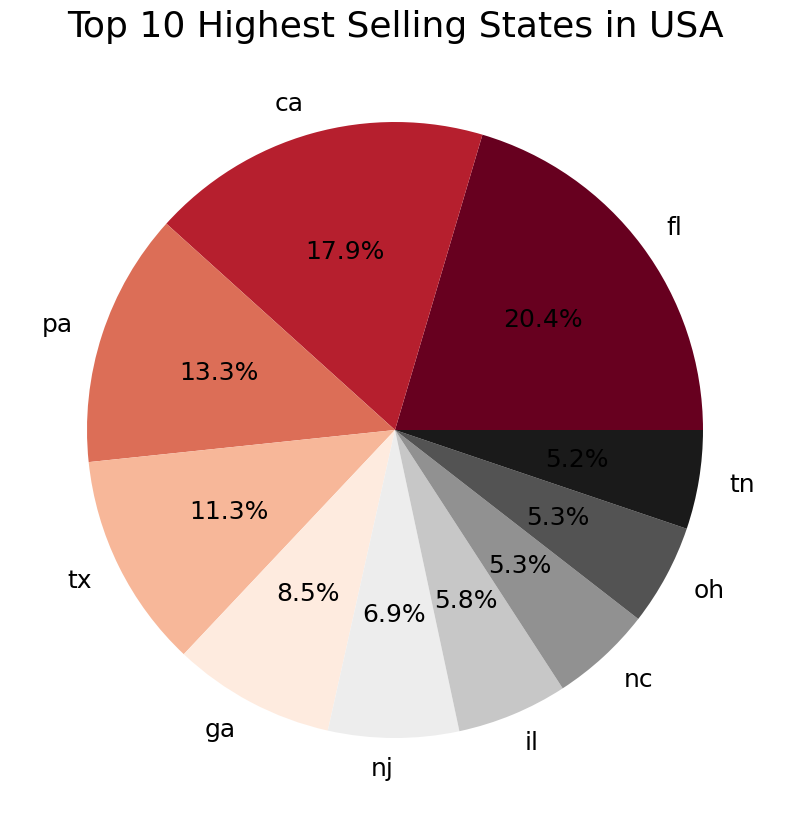

In [32]:
ax = df["state"].value_counts().head(10).plot(kind="pie",colormap="RdGy", figsize=(16,10), fontsize=18, autopct='%1.1f%%')
ax.set_title("Top 10 Highest Selling States in USA", fontsize=26)
ax.set_ylabel("")
plt.show()

>1. ### *According to the pie chart it can be seen that Florida(fl) is the state with most sales in total*
>2. ### *More than 50% of sales are done in 4 states; Florida(fl), California(ca), Pennsylvania(pa) and Texas(tx)*
>---

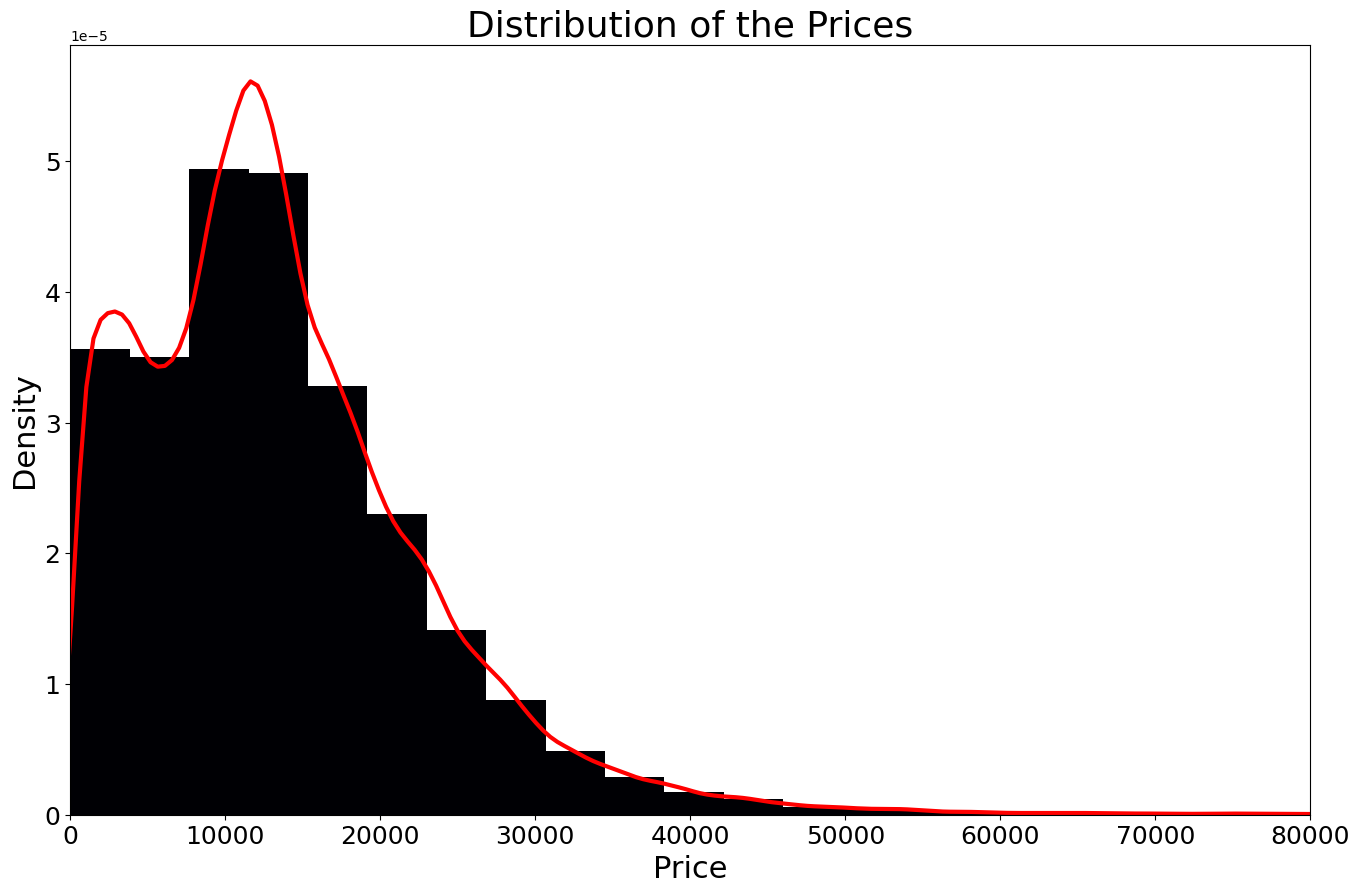

In [33]:
ax = df["sellingprice"].plot(kind="hist",bins=60, colormap="inferno", density=True, figsize=(16,10), fontsize=18, xlim=(0,80000))
ax.set_title("Distribution of the Prices", fontsize=26)
ax.set_xlabel("Price", fontsize=22)
df["sellingprice"].plot(kind="kde", ax=ax, linewidth=3, color="red")
ax.set_ylabel("Density", fontsize=22)
plt.show()

>1. ### *According to the histogram and KDE it can be seen that cars priced from 10000 to 20000 are the most sold in general*
>2. ### *More expensive cars are not that popular and are sold rarely*
>---

---

># **RELATIONSHIP UNEDRSTANDING**

---

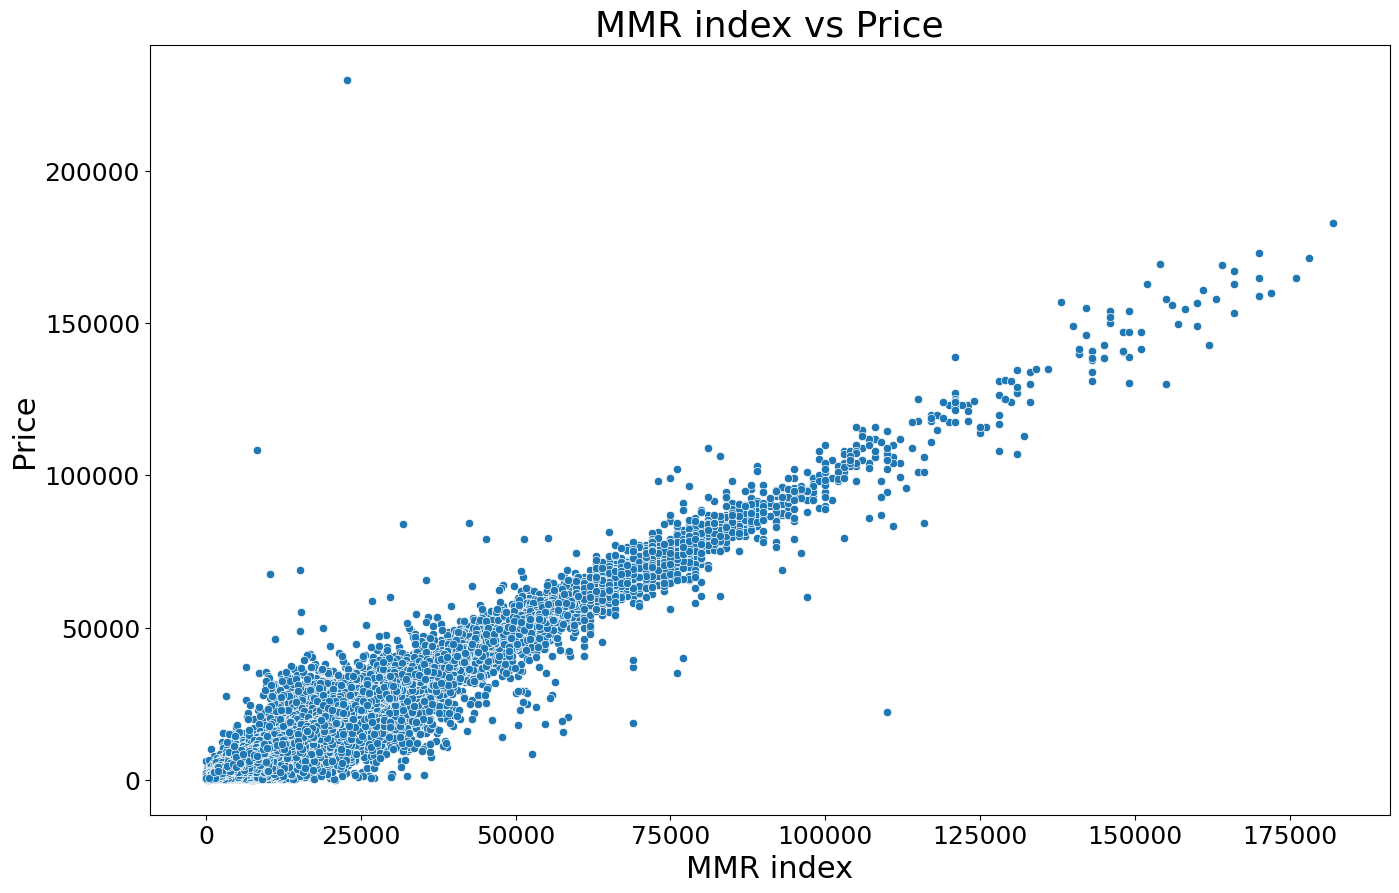

In [60]:
fig, ax = plt.subplots(figsize=(16,10))
sns.scatterplot(data=df, x="MMR index", y="sellingprice")
plt.title("MMR index vs Price", fontsize=26)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("MMR index", fontsize=22)
plt.ylabel("Price", fontsize=22)
plt.show()

>1. ### *MMR index being the indicator of the real car prices in the world plotting it against selling price can show the margins that dealerships impose*
>2. ### *According to the scatter plot it can be seen that relationship is positive. Meaning that differences are not that high*
>3. ### *3 outliers are present which is negligible when the size of the dataset is taken into account* 
>---

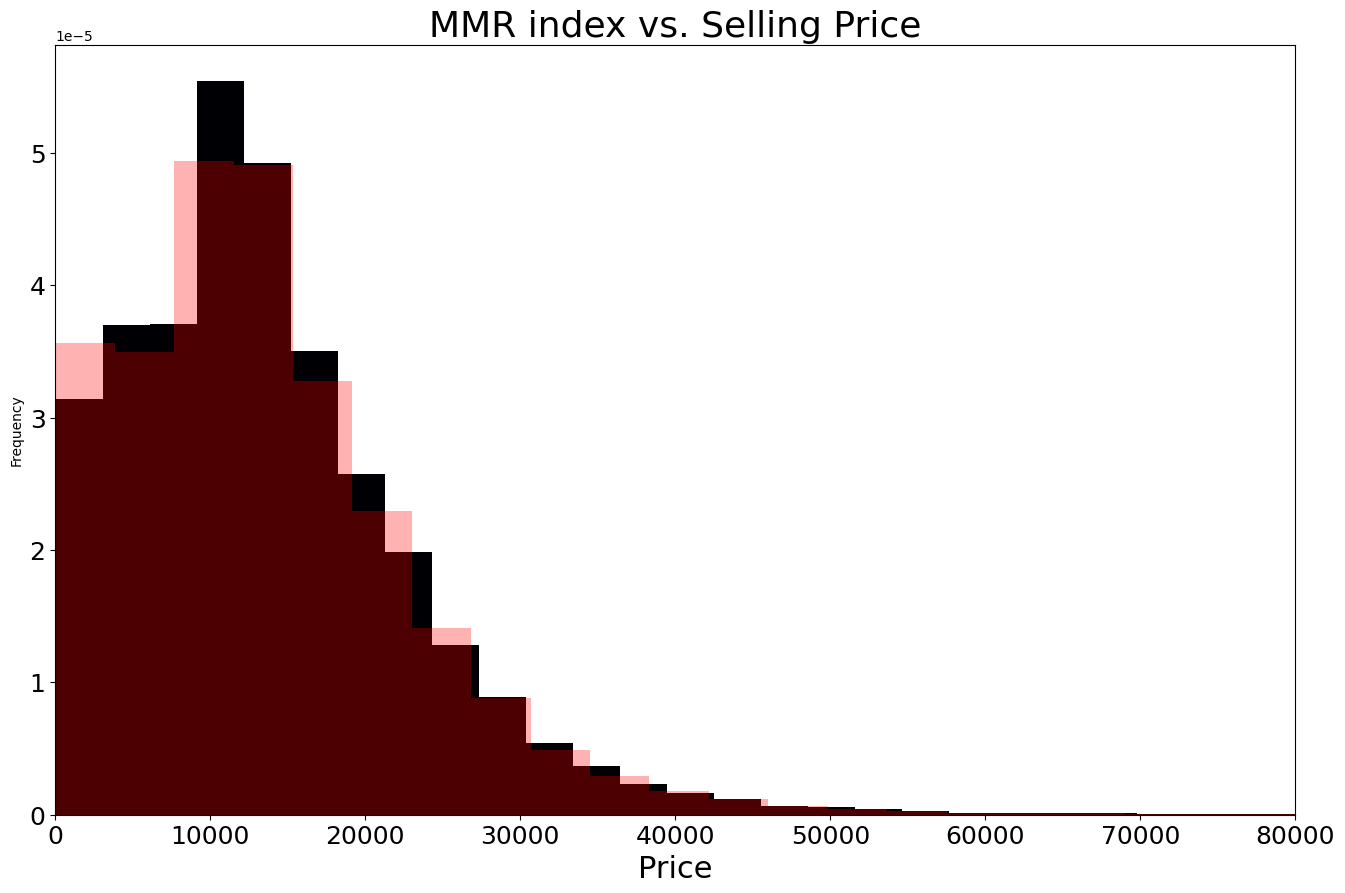

In [35]:
ax = df["MMR index"].plot(kind="hist",bins=60, colormap="inferno", density=True, figsize=(16,10), fontsize=18, xlim=(0,80000))
ax.set_title("MMR index vs. Selling Price", fontsize=26)
df["sellingprice"].plot(kind="hist",bins=60, density=True, color="red", fontsize=18, xlim=(0,80000), ax=ax, alpha=0.3)
ax.set_xlabel("Price", fontsize=22)
plt.show()

>1. ### *Expanding on the previous scatter plot histogram with overlay of both MMR index and selling price can improve the visualization opportunity in terms of differences*
>2. ### *It can be seen that the highest difference in price and MMR is around 10000 to 20000 range*
>---

In [36]:
df_correlation = df[["year","mileage", "MMR index", "sellingprice", "price_diff", "condition"]].corr()

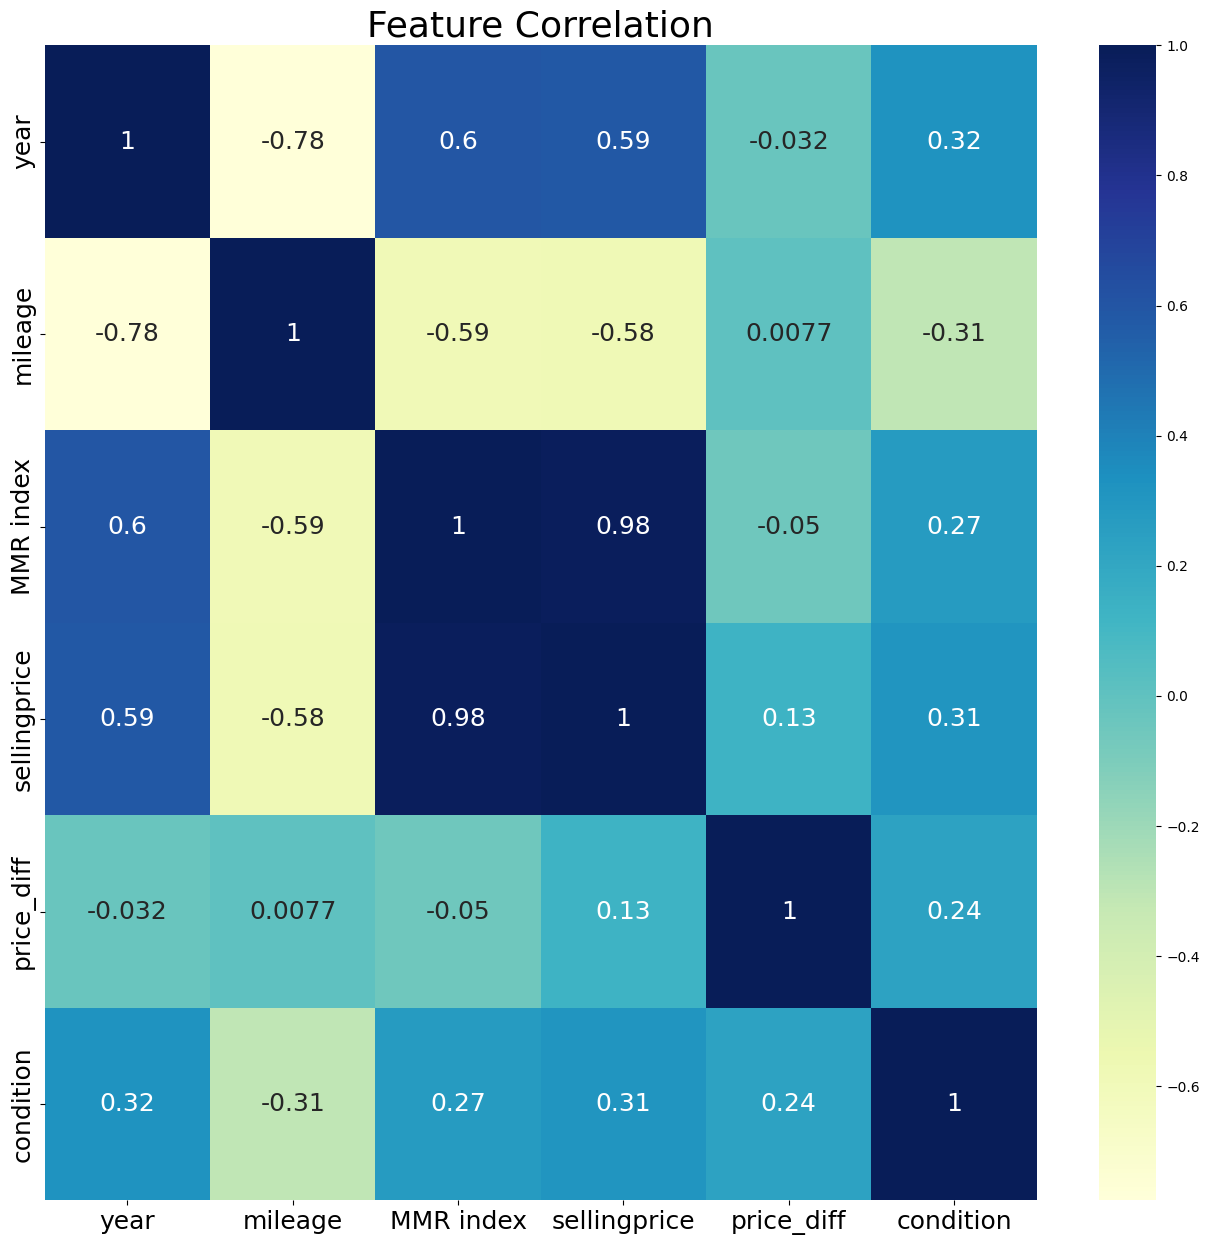

In [59]:
fig, ax = plt.subplots(figsize=(16,15))
sns.heatmap(df_correlation, annot=True, cmap="YlGnBu", annot_kws={"size": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title("Feature Correlation", fontsize=26)
plt.show()


In [38]:
custom_plt = sns.color_palette("plasma", as_cmap=True)

---

># **BUSINESS QUESTION ASNWERING**

---

---

>#### **WHAT IS THE IMPACT OF MILEAGE ON SALES?**

---

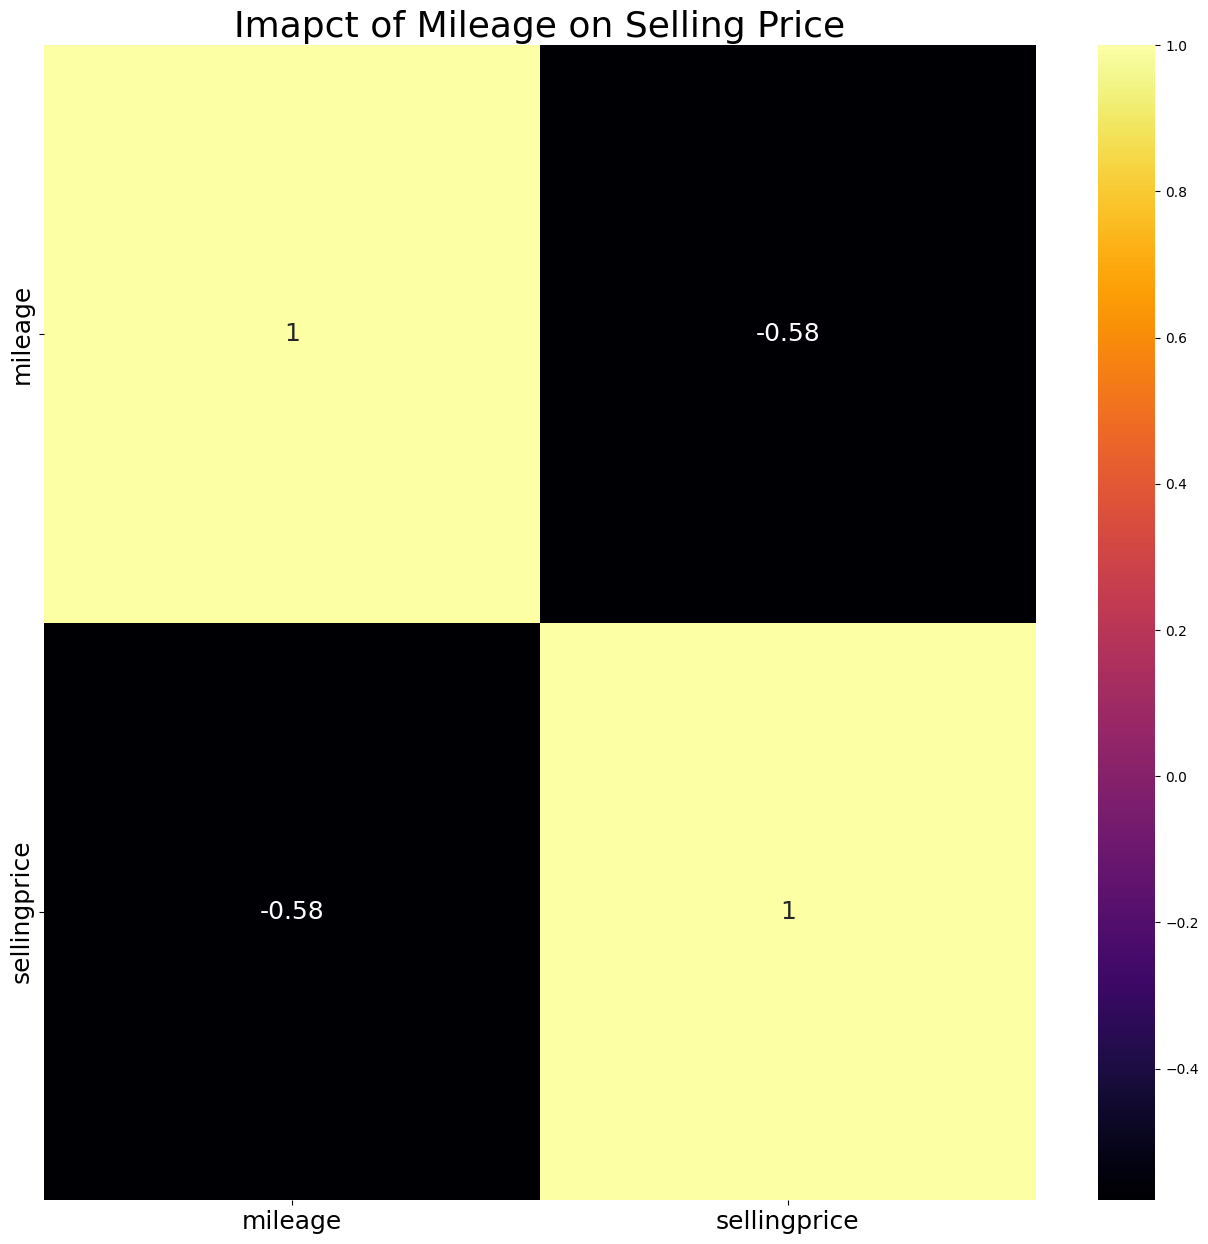

In [39]:
corre = df[["mileage" , "sellingprice"]].corr()
corre
fig, ax = plt.subplots(figsize=(16,15))
sns.heatmap(corre, annot=True, cmap="inferno", annot_kws={"size": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title("Imapct of Mileage on Selling Price", fontsize=26)
plt.show()

>1. ### *It can be seen on the heatmap that correlation is negative which summarizes that two features are negatively related to each other*
>2. ### *Increase in mileage means a general trend of decrease in the selling price*
>---

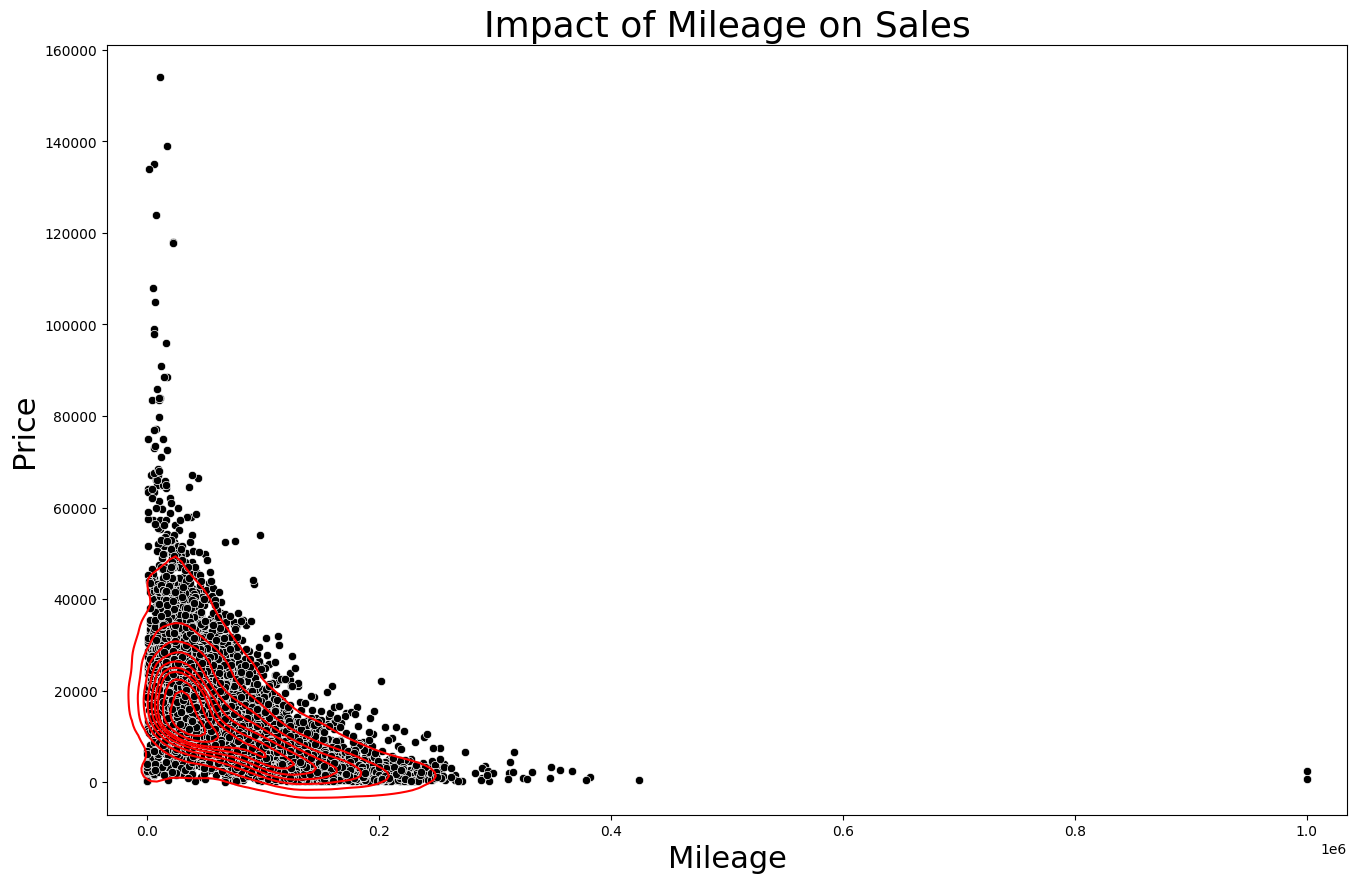

In [40]:
fig, ax = plt.subplots(figsize=(16,10))
sns.scatterplot(x=df["mileage"].head(10000), y=df["sellingprice"].head(10000), color="black")
sns.kdeplot(x=df["mileage"].head(10000), y=df["sellingprice"].head(10000), color="red")
plt.title("Impact of Mileage on Sales", fontsize=26)
plt.xlabel("Mileage", fontsize=22)
plt.ylabel("Price", fontsize=22)
plt.show()

>1. ### *Plotting all values for two features against each other shows the negative relationship more clearly*
>2. ### *General trend of the data is negative showing increase in mileage and decrease in price*
>3. ### *Additional KDE lines (red) are all sloping down reinforcing the previous statements*
>---

>---
>### **This question will help the firm to understand the relationship between the mileage of the car and the price to make sound decisions and regarding the inventory of the dealership.**
>---

---

>#### **WHAT ARE THE TOP 5 HIGHEST SELLING COLORS FOR KIA AND IN WHICH STATES WERE THEY SOLD?**

---

In [41]:
kia_sold = df[df["make"] == "Kia"]
kia_colors = kia_sold.groupby(["state", "color"]).size().reset_index(name="count")
top_kia = kia_colors.sort_values(by="count", ascending=False).head(5)
top_kia

,state,color,count
55,fl,black,544
68,fl,white,541
67,fl,silver,493
61,fl,gray,413
23,ca,black,363


>1. ### *Filtering is done initially to access the data for the KIA make*
>2. ### *Then the data is grouped based on two features "state", "color" as question specifically requires these two features and the aggregation is for the frequency of selling*
>3. ### *Values are sorted in descending order to access the first 5 highest sellers and the data is sliced to include first five entries*
>---

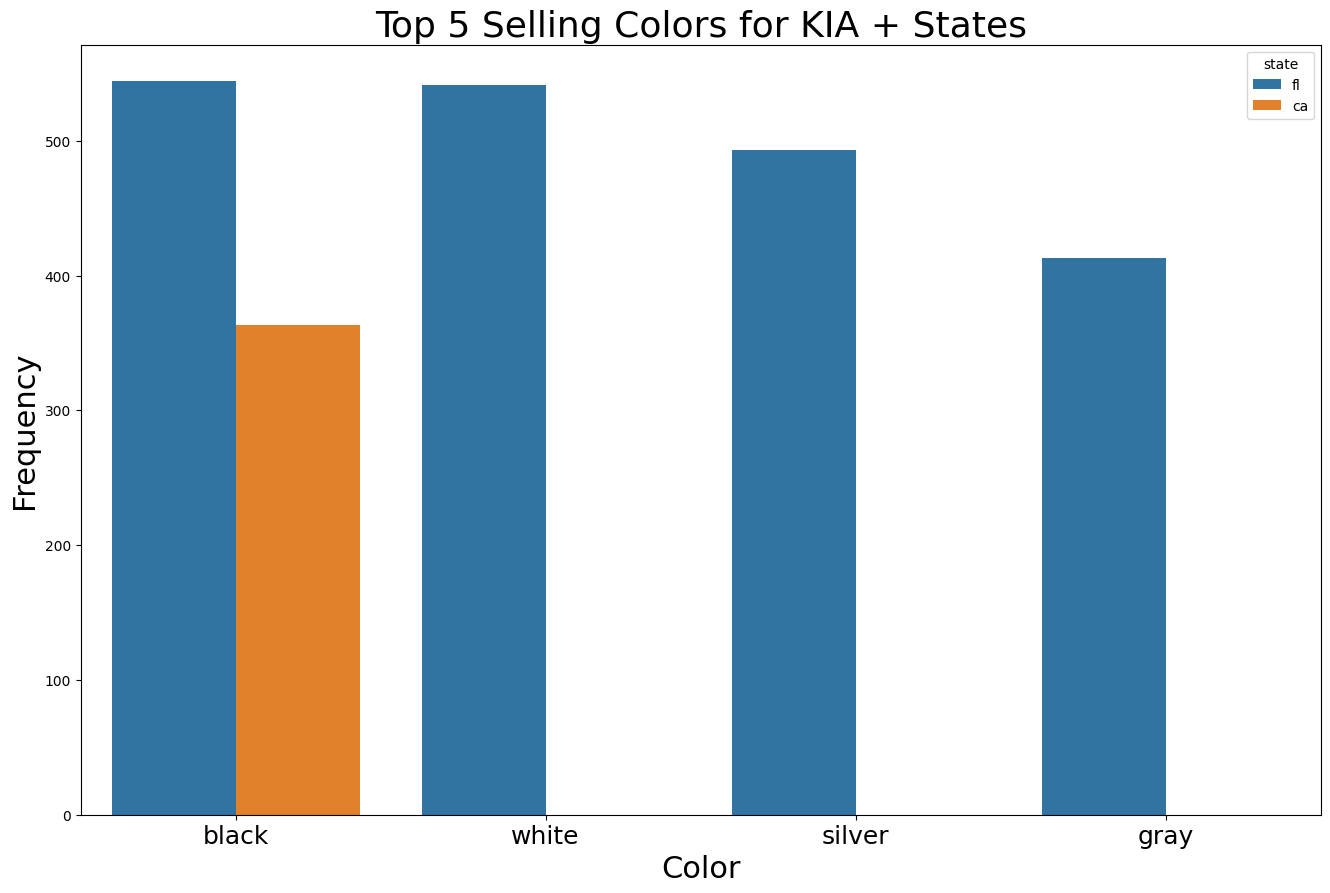

In [42]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(top_kia, x="color", y="count", hue="state")
plt.title("Top 5 Selling Colors for KIA + States", fontsize=26)
plt.xlabel("Color", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.xticks(fontsize=18)
plt.show()

>1. ### *Plotting the bar chart reveals that there are 4 popular colors in the state of Florida and 1 for California*
>2. ### *The frequency of sales for 4 colors are roughly the same across the Florida*
>3. ### *Least highest sold color in the state of California is black and is lowest across the Series*
>---

>---
>### **Answering posed question will help the company to understand the popularity of design choices throughout the market and popularity of these design choices when handling the supply.**
>---


---

>#### **WHAT OS THE CORRELATION BETWEEN CONDITION AND MILEAGE FOR YEAR 2015?**

---

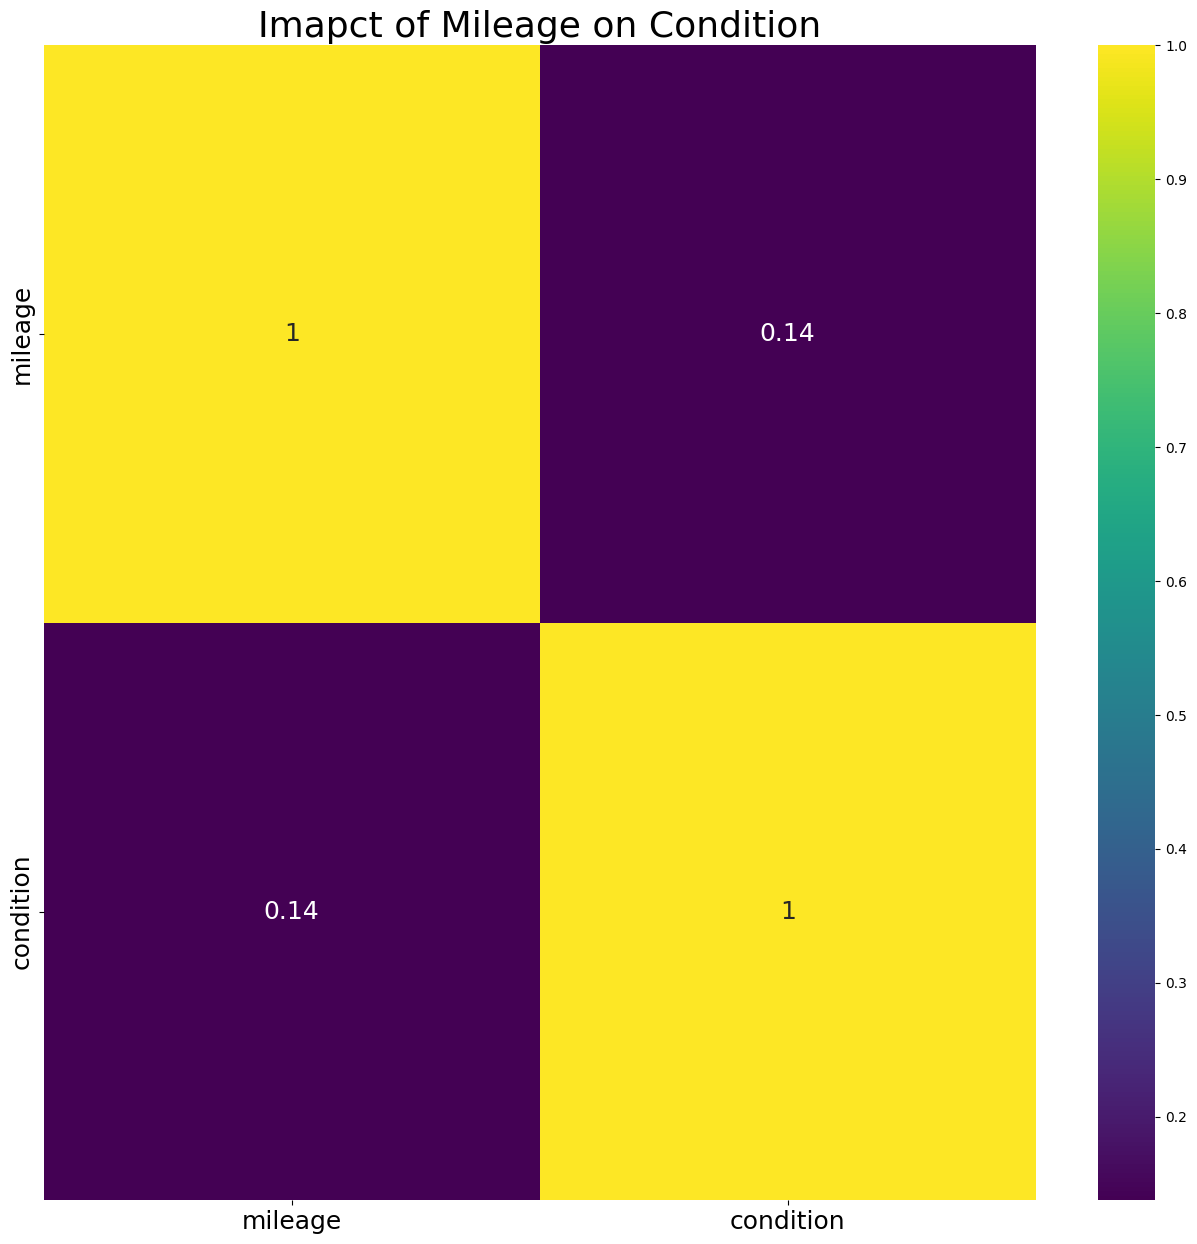

In [43]:
yr2015 = df[df["year"] == 2015]
yr2015
year15_corr = yr2015[["mileage", "condition"]].corr()
fig, ax = plt.subplots(figsize=(16,15))
sns.heatmap(year15_corr, annot=True, cmap="viridis", annot_kws={"size": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title("Imapct of Mileage on Condition", fontsize=26)
plt.show()


>1. ### *Plotting the heat map we can see that impact of mileage on condition is low near zero*
>2. ### *That means that fluctuations in mileage do not necessarily have impact on vehicle's condition*
>3. ### *Low relationship might be due to different levels of care previous owners of the vehicle exercised*
>---

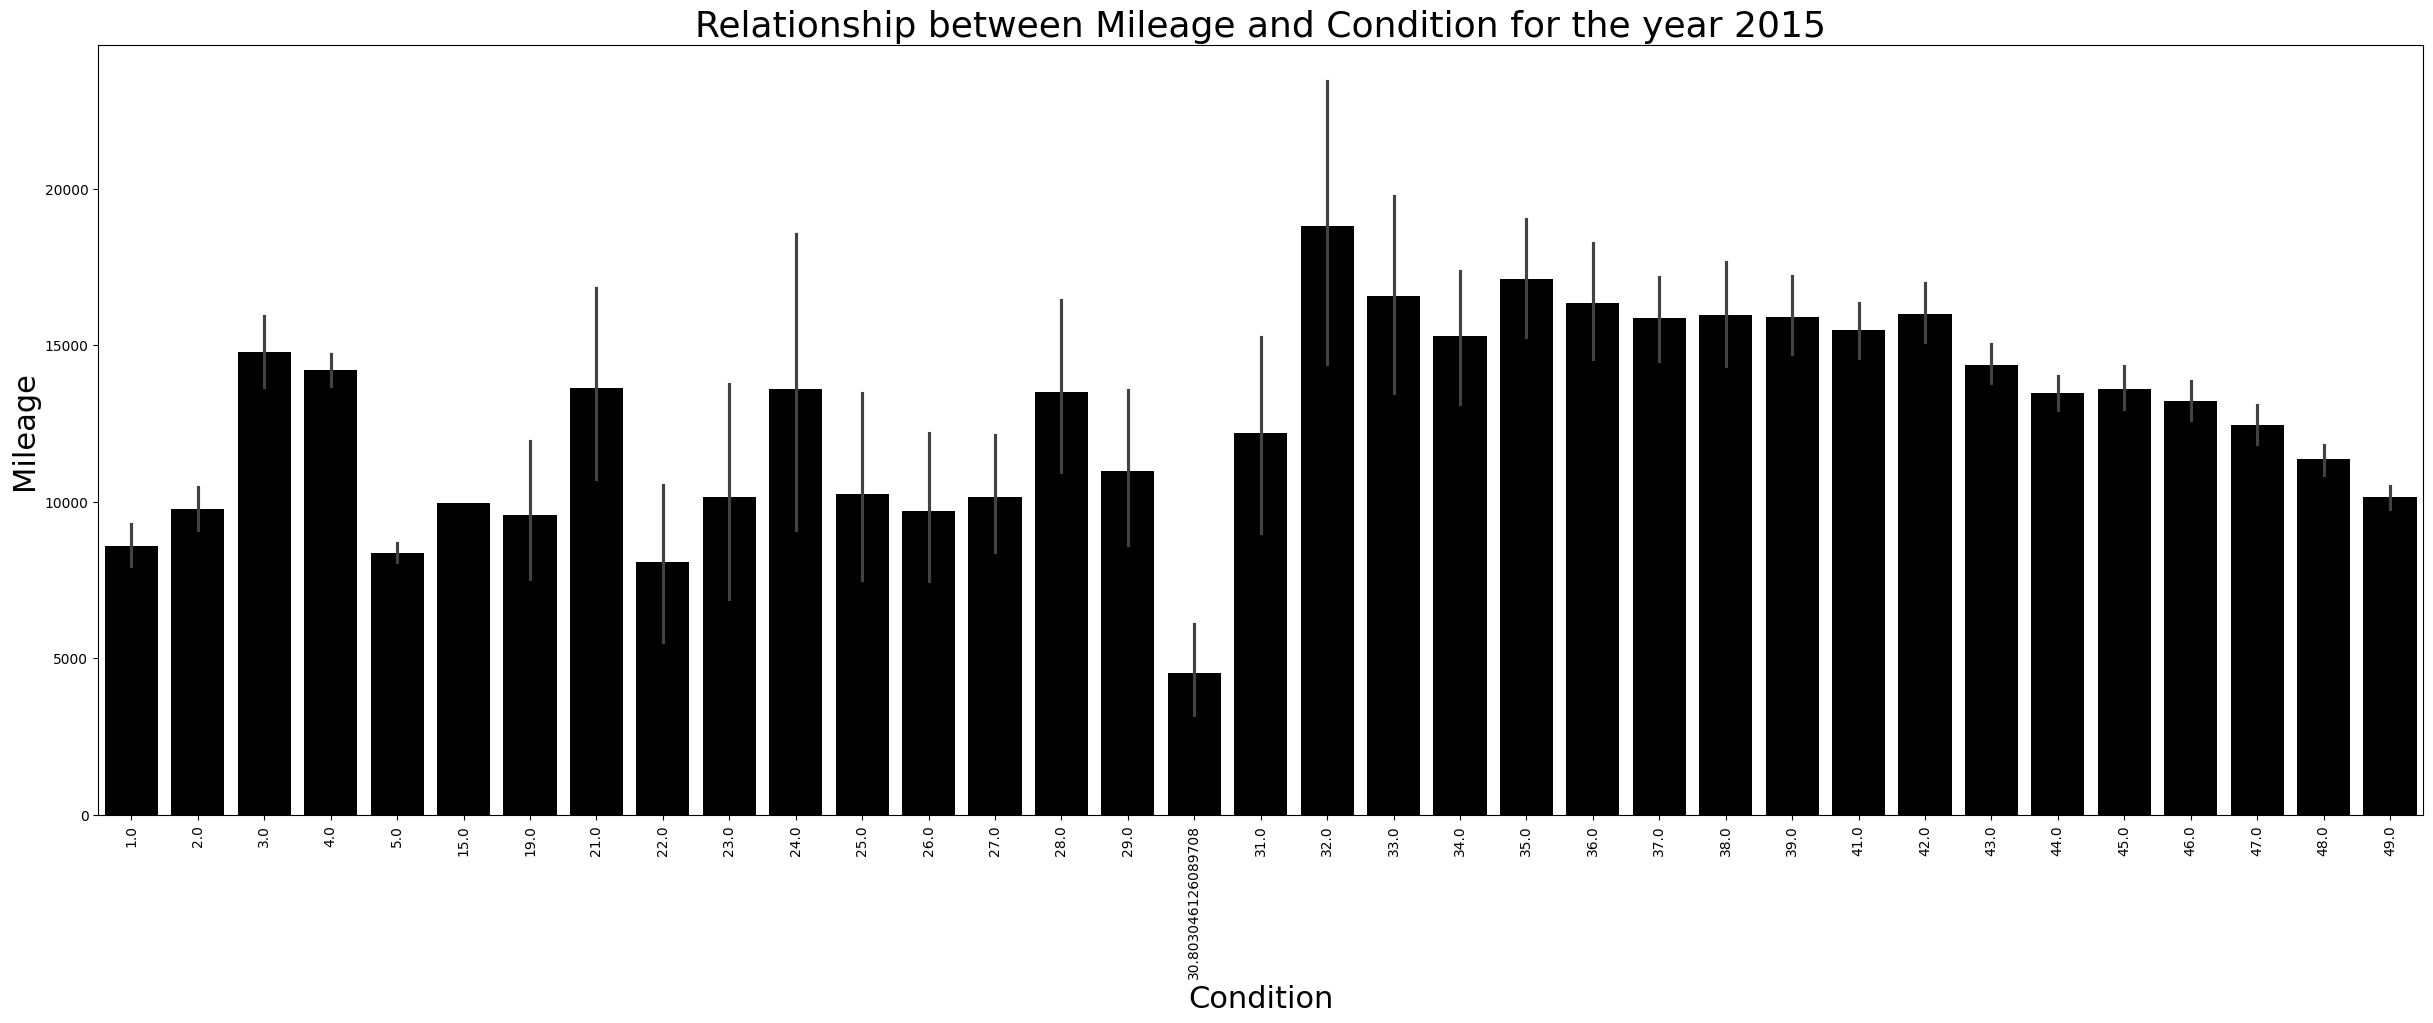

In [44]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x=yr2015["condition"], y=yr2015["mileage"], color="black")
plt.xticks(rotation=90)
plt.title("Relationship between Mileage and Condition for the year 2015", fontsize=26)
plt.xlabel("Condition", fontsize=22)
plt.ylabel("Mileage", fontsize=22)
plt.show()


>1. ### *Bar chart shows high fluctuations as per previously showed heatmap*
>2. ### *It can be seen that frequency of cars with medium condition ~32 have ~17000 miles*
>3. ### *However, cars with lowest condition have lower milage and has high frequency similarly as per previously showed heatmap*
>---

>---
>### **Answering this question will help to understand how mileage will affect the car's condition additionally give insight into importance of personal touch of the previous owners.**
>---

---

>#### **WHICH TOP 3 SELLERS ARE THE MOST SUCCESSFUL IN THE MARKET AND WHAT CARS ARE THE MOST POPULAR FROM THOSE DEALERSHIPS?**

---

In [45]:
sellers = df.groupby('seller').agg({"make" : "count"}).reset_index()
top_sellers = sellers.sort_values(by="make", ascending=False).head(3)
pop_make = df.groupby('seller')["make"].agg(lambda i: i.value_counts().idxmax()).reset_index()
merged = pd.merge(top_sellers, pop_make, on="seller")
merged

,seller,make_x,make_y
0,nissan-infiniti lt,19693,Nissan
1,ford motor credit company llc,19141,Ford
2,the hertz corporation,18261,Chevrolet


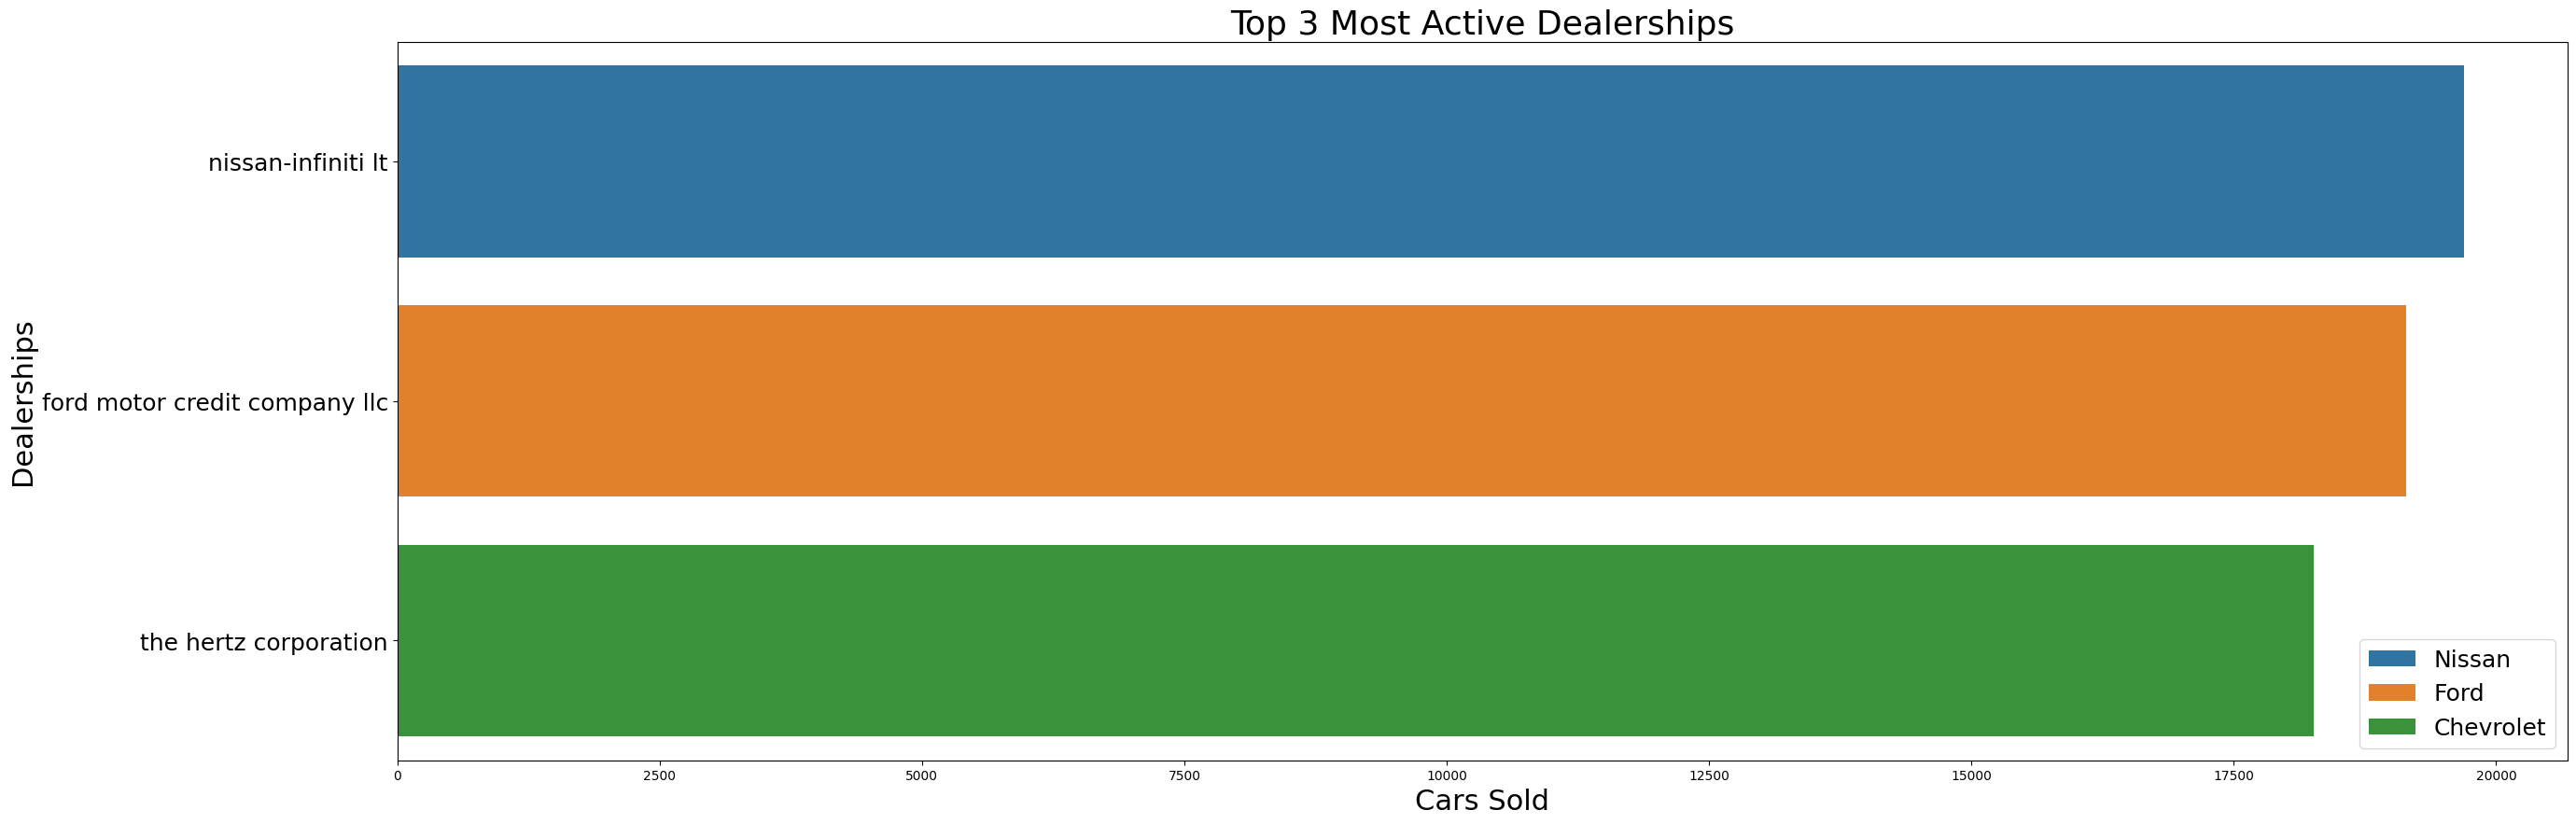

In [46]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(merged, x="make_x", y="seller", hue="make_y")
plt.title("Top 3 Most Active Dealerships", fontsize=26)
plt.xlabel("Cars Sold", fontsize=22)
plt.yticks(fontsize=18)
plt.ylabel("Dealerships", fontsize=22)
plt.legend(fontsize=18)
plt.show()

>1. ### *As can be seen on the hbar chart nissan infiniti limited sold highest amount of cars ~19000 cars*
>2. ### *All three top selling dealerships have nearly the same performance turnover wise*
>3. ### *Nissan was the most popular vehicle purchased throughout the states for all time*
>---

>---
>### **Answering this question will provide insight into competition's performance and selling patterns moreover, give an idea about what vehicles might be beneficial to stock.**
>---

---

>#### **FOR THE MOST POPULAR MAKE WHAT ARE THE MOST SOLD MODEL OF THE CARS IN THE "CA" STATE?**

---

In [48]:
ca_state = df[df["state"] == "ca"]
popular_make = ca_state["make"].value_counts().idxmax()
ca_most_pop_make = ca_state[ca_state["make"] == popular_make]
ca_grouped = ca_most_pop_make.groupby("model").size()
most_pop_models  = ca_grouped[ca_grouped == ca_grouped.max()]

>1. ### *Initially the dataset is filtered to include only data-points which are located in the state of California*
>2. ### *Maximum value is assigned to a variable which extract the highest value from value_counts*
>3. ### *Further resulting series is grouped by the model of a vehichle aggregated by count*
>4. ### *Finally maximum value from the grouped series is assigned to a variable to find the most popular make and model of a car in California*
>---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


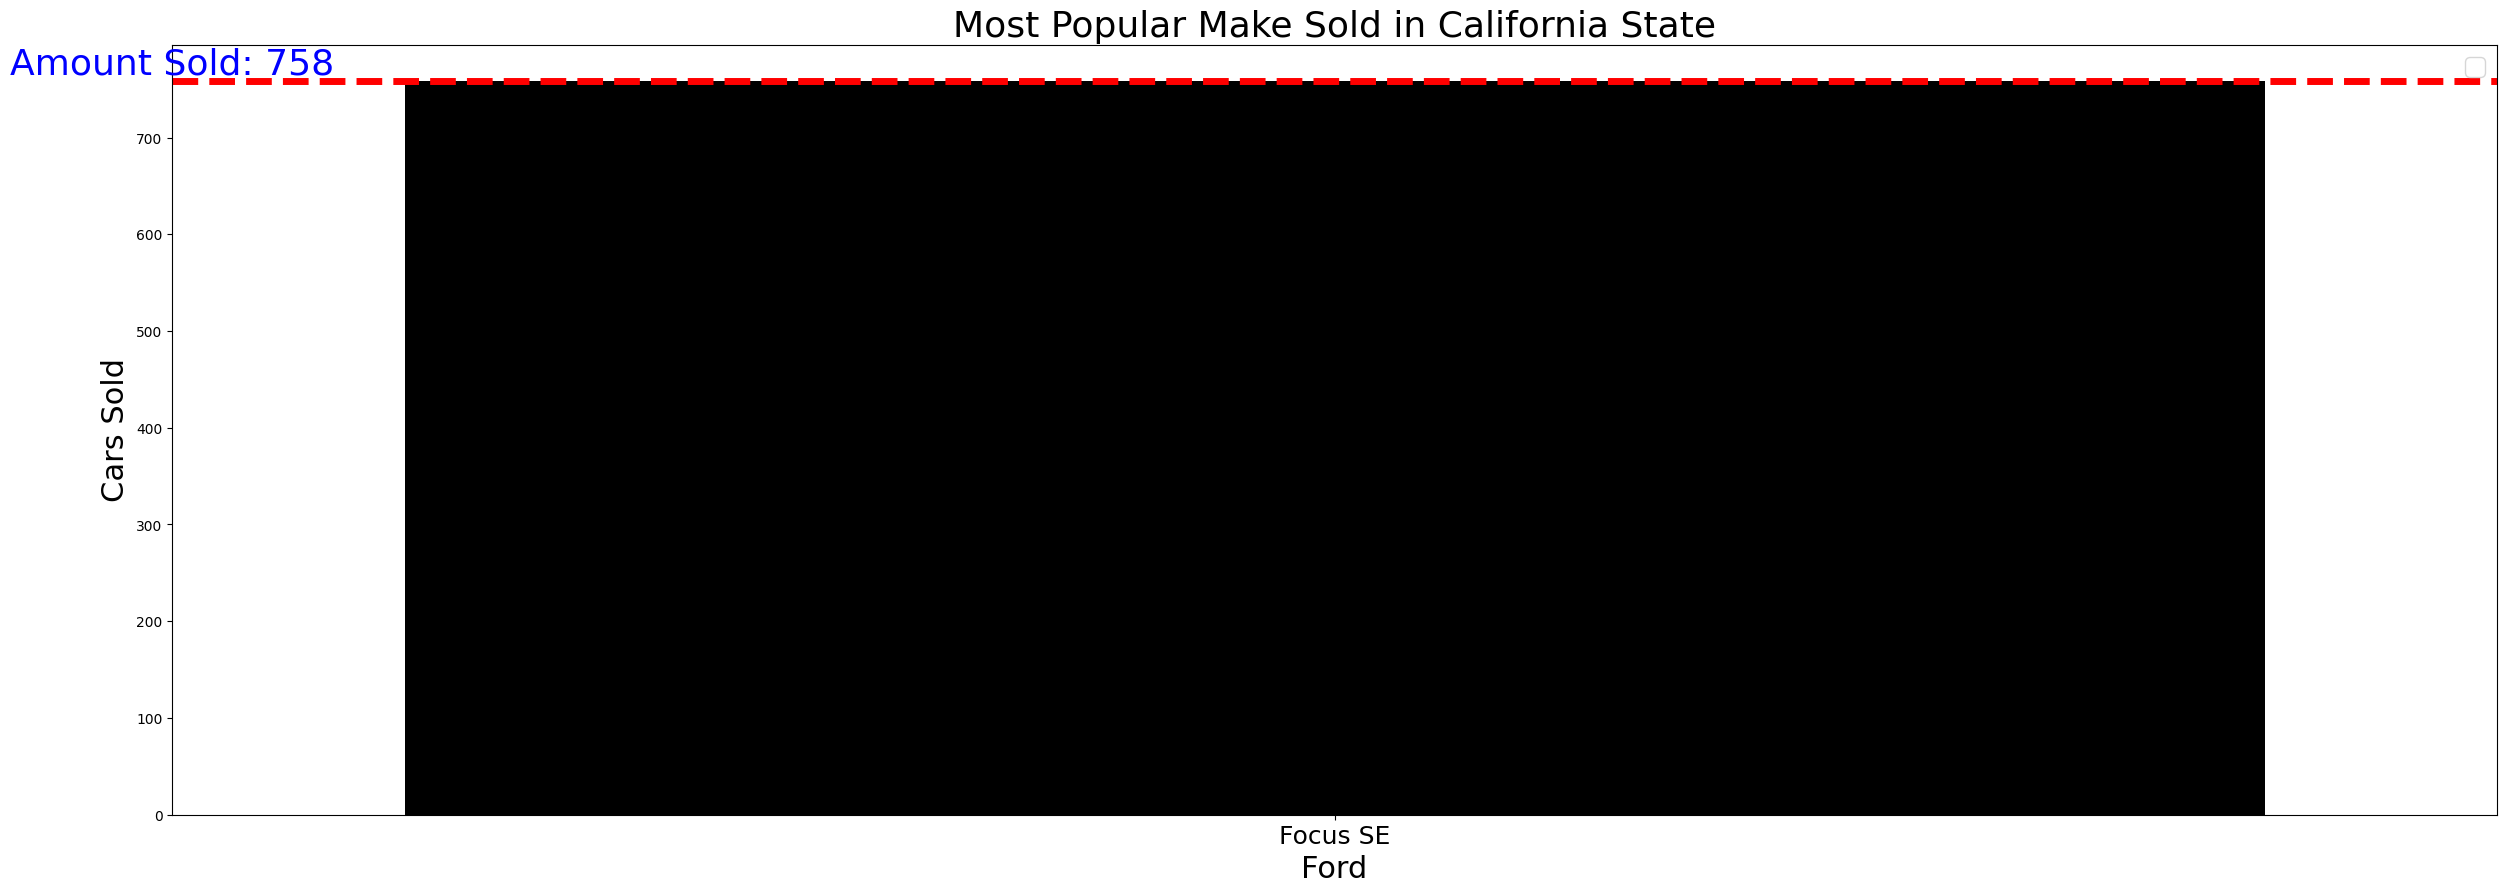

In [49]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(most_pop_models, color="black")
max_val = most_pop_models.max()
plt.axhline(y=max_val, color="red", linewidth=5, linestyle="--")
plt.text(-0.5, max_val, f'Amount Sold: {max_val}', fontsize=26, ha="center", va="bottom", color="blue")
plt.title("Most Popular Make Sold in California State", fontsize=26)
plt.xlabel(f"{popular_make}", fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel("Cars Sold", fontsize=22)
plt.legend(fontsize=18)
plt.show()

>1. ### *As can be seen on the bar chart only singular feature is visualized this is due to the nature of the question*
>2. ### *It is evident that the highest selling make and model of the vehicle sold was Ford Focus SE*
>3. ### *Horiztal axis line was adde to clearly visualize the maximum value at 758 cars sold*
>---

>---
>### **Answering this question will provide insight into which model and make of the car is most popular in local areas to the dealership creating opportunity for a data-driven inventory stocking.**
>---

---

>#### **WHICH DEALERSHIP HAS THE HIGHEST DIFFERENCE BETWEEN MMR INDEX AND SELLING PRICE?**

---

In [51]:
seller_group = df.groupby("seller")["price_diff"].max().reset_index()
seller_group.sort_values(by="price_diff", ascending=False)
max_index = seller_group["price_diff"].idxmax()
max_seller = seller_group.loc[[max_index]]
max_seller

,seller,price_diff
5178,ford-lincoln dealer program,207200.0


>1. ### *In order to access the price difference data on sellers first the dataframe has to be groupedby seller with price difference aggregation on maximum*
>2. ### *Values are further sorted in descending order*
>3. ### *Maximum values is further extracted from the series using idxmax() method*
>4. ### *Finally using by passing th index of the highest value into lov method we can find the seller with highest difference between MMR and Selling Price*
>5. ### *As can be seen the highest seller was Ford-Lincoln Dealer Program with the difference of 207200 USD*
>---

---

>#### **WHICH BODY TYPE HAD THE BEST CONDITION FOR THE YEAR 2013?**

---

In [93]:
yr2013 = df[df["year"] == 2013]
bodytype = yr2013.groupby("body")["condition"].mean().reset_index()

>1. ### *To access the data for the year 2013 dataframe has to be filtered initially*
>2. ### *Resulting series is grouped by the body type and aggregated based on the condition average*
>---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


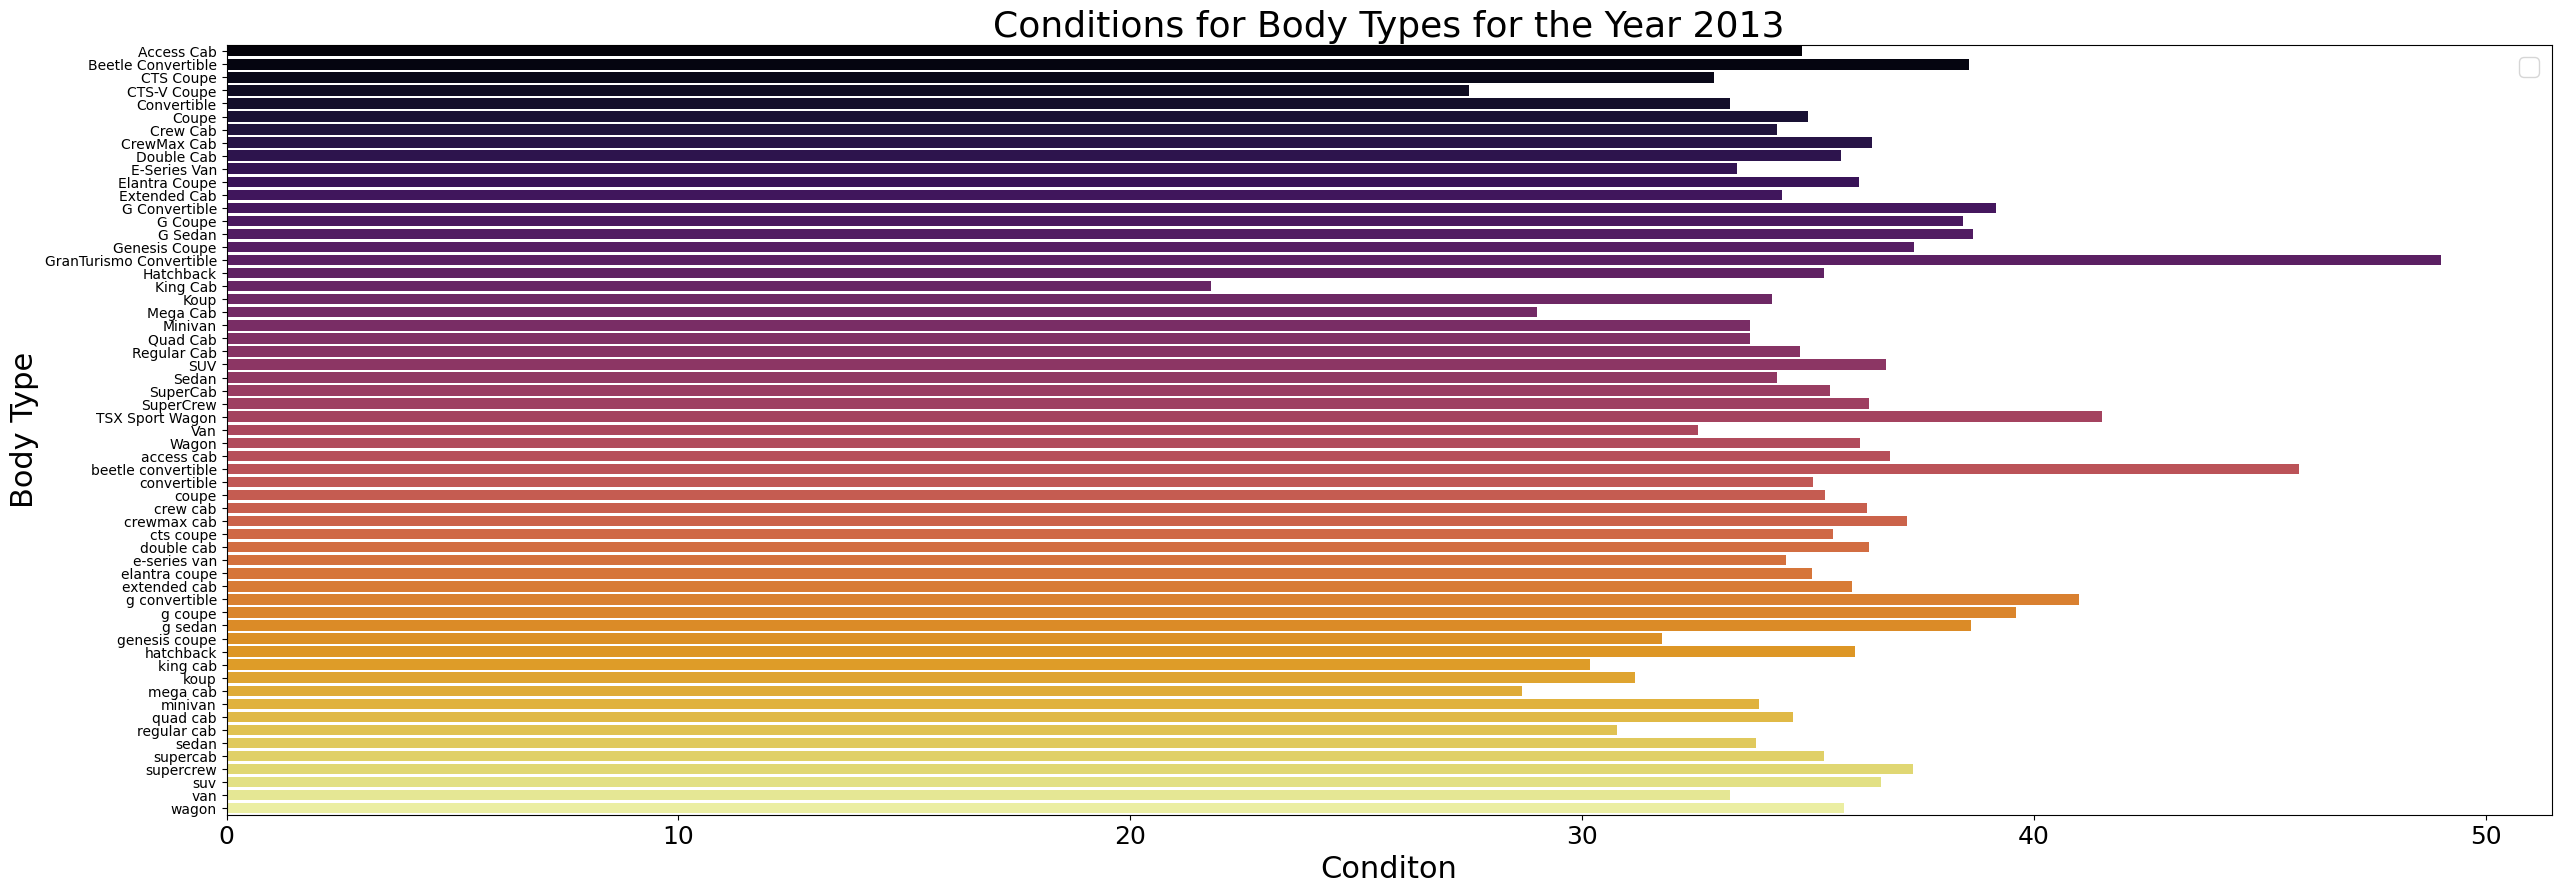

,body,condition
58,wagon,35.79096
16,GranTurismo Convertible,49.00000


In [102]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(bodytype, x="condition", y="body", palette="inferno", hue="body", legend=False)
plt.title("Conditions for Body Types for the Year 2013", fontsize=26)
plt.xlabel("Conditon", fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel("Body Type", fontsize=22)
plt.legend(fontsize=18)
plt.show()
bodytype_max_index = bodytype.idxmax()
best_body = bodytype.loc[bodytype_max_index]
best_body

>1. ### *After the barchart has been plotted it can be seen that the highest condition for the year 2013 was for the body type of the GranTurismo Convertible*
>---

>---
>### **Answering this question can help the dealership to make decision on whether to barter cars that are sold in 2013. Moreover, gives general insight in vehicles durability.**
>---

---

>#### **WHAT IS THE CORRELATION BETWEEN COLOR AND SELLING PRICE FOR THE TENNESSEE STATE?**

---

In [126]:
ten = df[df["state"] == "tn"]
ten_color = ten.groupby("color")["sellingprice"].mean().reset_index()
ten_color.drop(ten_color.index[-1], inplace=True)
ten_color_max = ten_color.loc[ten_color.idxmax()]
ten_color

,color,sellingprice
0,beige,11348.776224
1,black,18149.063260
2,blue,13864.272575
3,brown,19184.051724
4,burgundy,14707.839721
5,charcoal,11914.285714
6,gold,10825.185874
7,gray,16882.700848
8,green,12517.679558
9,lime,9900.000000


>1. ### *First the dataset has to be filtered to include the data-point from the state Tennessee*
>2. ### *Filtered series are then grouped by color and aggregated by average selling price*
>3. ### *Unfortunately, there was a missed artefact that was dropped from the Series*
>4. ### *Using lov and idxmax method highest value is found*
>---

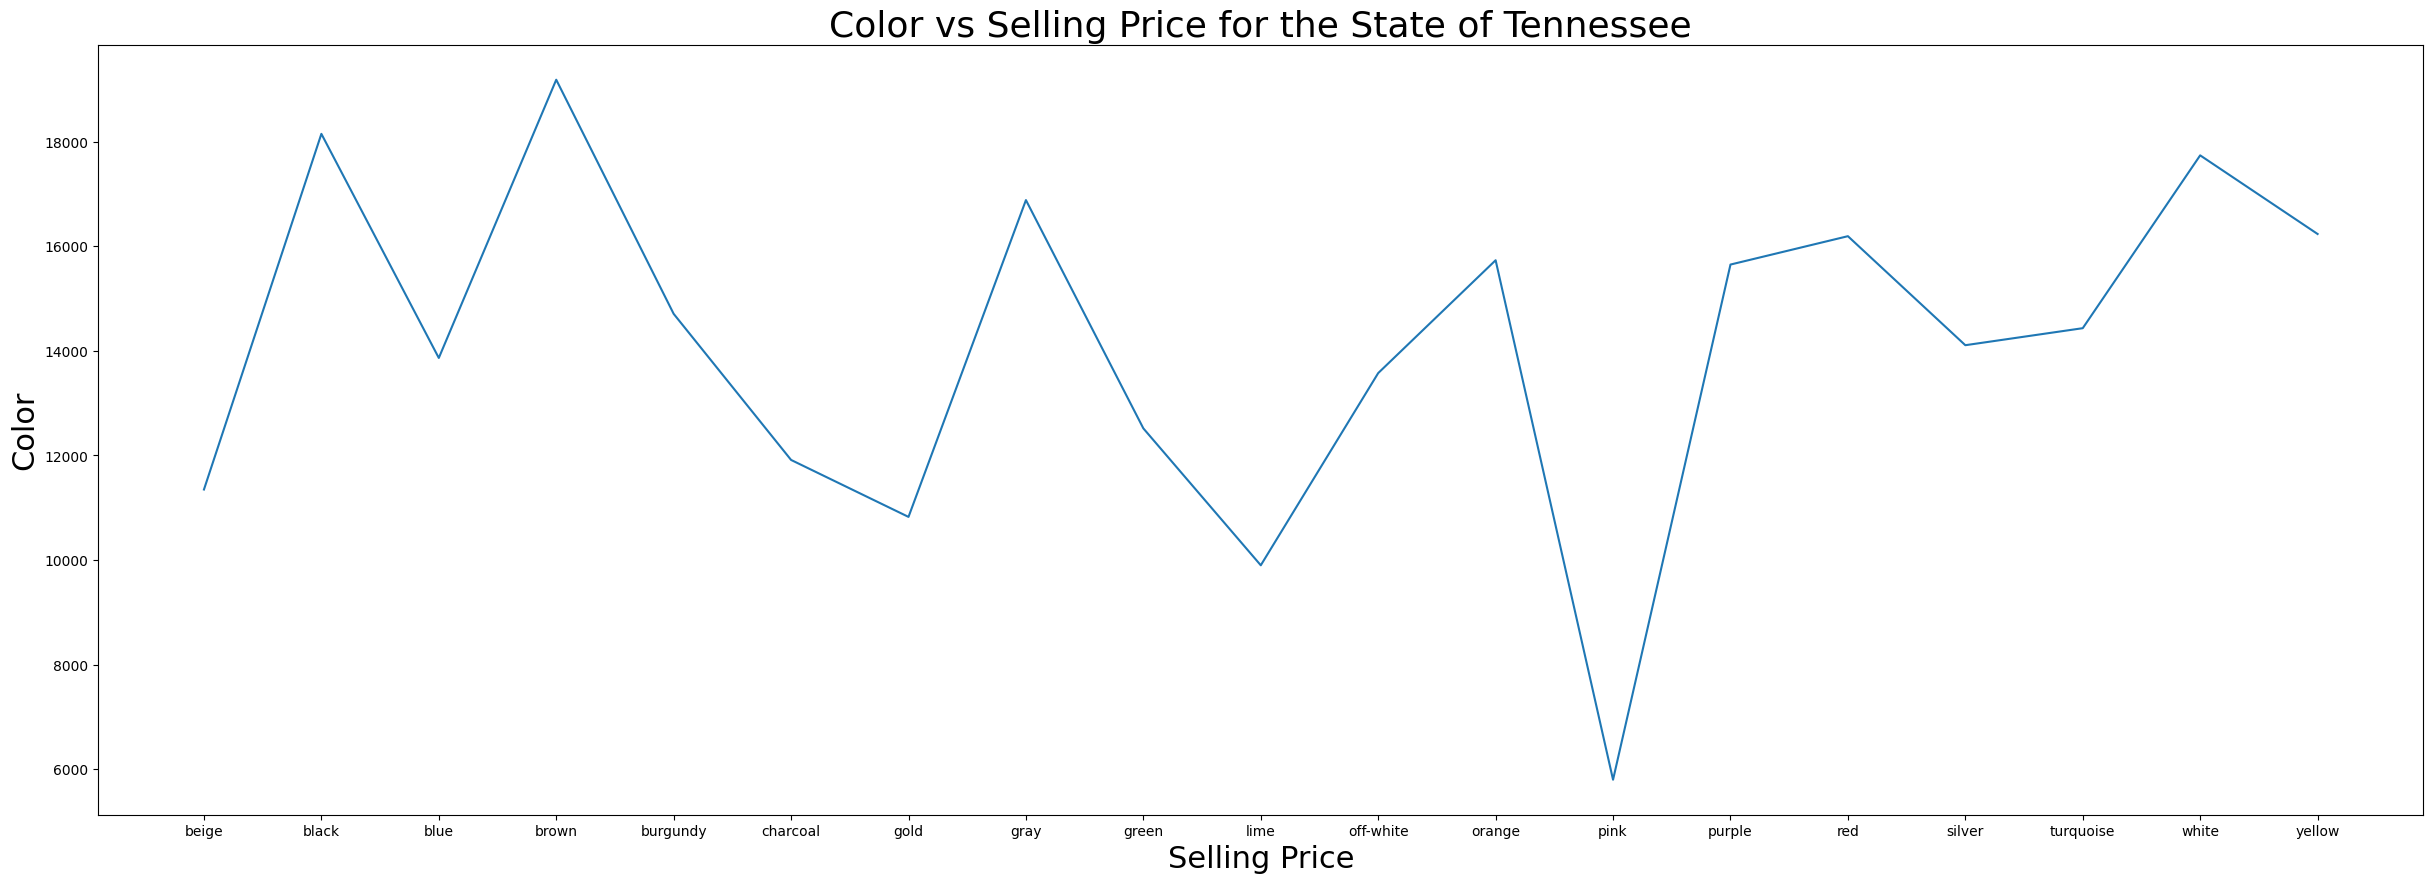

,color,sellingprice
18,yellow,16234.375000
3,brown,19184.051724


In [129]:
fig, ax = plt.subplots(figsize=(30,10))
sns.lineplot(data=ten_color ,x="color", y="sellingprice")
plt.title("Color vs Selling Price for the State of Tennessee", fontsize=26)
plt.xlabel("Selling Price", fontsize=22)
plt.ylabel("Color", fontsize=22)
plt.show()
ten_color_max


>1. ### *Lineplot shows that the most expensive color for a vehicle in the Tennessee state was brown at 19184 USD with yellow being second at 16234 USD*
>---

>---
>### **Answering this question can provide insight into consumer behavior into different states for example; Tennessee. As future expansion is planned within the company this can provide a good foundation for having a solid understanding of consumer needs and wants.**
>---

---

># **CONCLUSION AND RECOMMENDATIONS**
>---
>> ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*In conclusion it can be said that by using the information extracted from the data given. It is possible to provide large amounts insights into how the dealership should proceed. By analyzing trends and relationships It can be said that USA consumer base prefer American made cars in general. Most popular car for the local community is Ford Focus SE therefore, this specific model can be stocked more to the inventory of the dealership. Different insights into performance of competition also paints a clear picture into how other dealerships are posing themselves in the market. Understanding this can provide competitive edge to the business. Moreover, it was evident that Nissan, Ford and Chevrolet were the most popular cars in the best performing dealerships across the whole dataset. This in turn can provide an opportunity to undertake the same approach. Relationships between condition mileage and years were discussed as well. These can provide relevant information on inventory and bartering decisions.*

>> ### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Recommendations for future would be to collect more data not only from USA but from other countries for example such as Mexico. This would provide more insights into an international environment and can potentially pave the way for international expansion. Further, to undertake competitions inventory choices to improve in the areas where the dealership is lacking. Lastly, to take notice on esthetic aspects of the vehicles such as color and body type as they play an important role across the consumer base.*
---